Hourly Forecast RMSE (2023–2024): 0.51


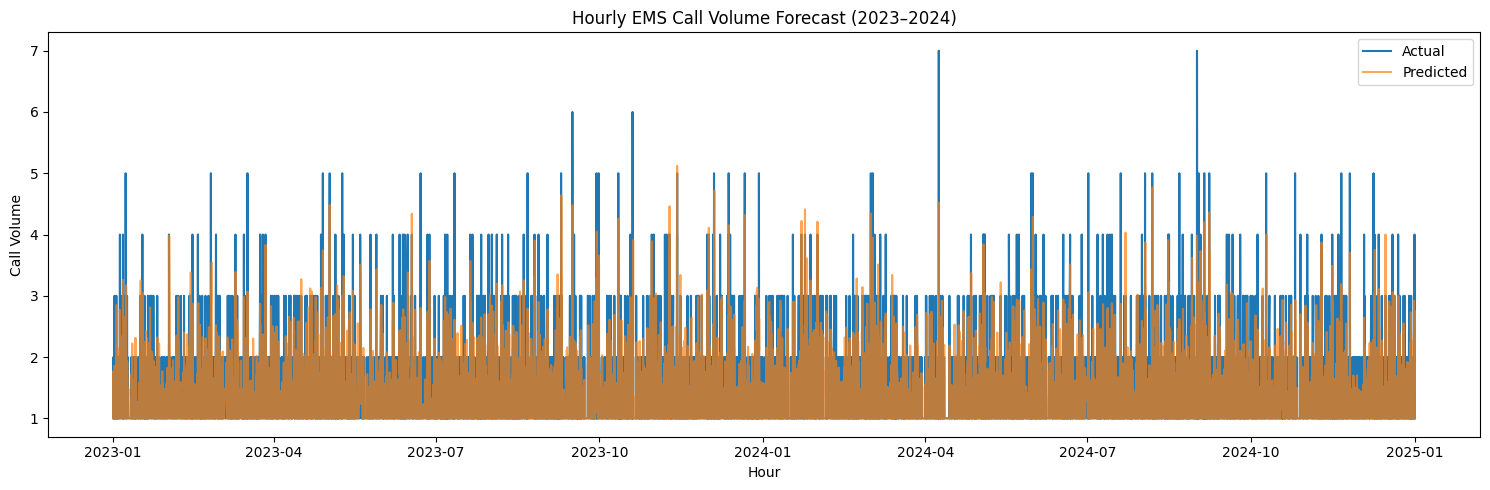

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- 1. Load and Filter Data ---
df = pd.read_csv("../data/clean/calls_full.csv")
df['CallDateTime'] = pd.to_datetime(df['CallDateTime'])

# Keep only full years 2017–2024
df = df[(df['CallDateTime'] >= '2017-01-01') & (df['CallDateTime'] < '2025-01-01')]

# --- 2. Aggregate to Hourly ---
df['hour'] = df['CallDateTime'].dt.floor('h')
hourly = df.groupby('hour').size().reset_index(name='call_volume')

# --- 3. Time-Based Features ---
hourly['hour_of_day'] = hourly['hour'].dt.hour
hourly['day_of_week'] = hourly['hour'].dt.dayofweek
hourly['week_of_year'] = hourly['hour'].dt.isocalendar().week.astype(int)
hourly['month'] = hourly['hour'].dt.month
hourly['year'] = hourly['hour'].dt.year

# --- 4. Lag & Rolling Features ---
for lag in [1, 24, 48, 168]:
    hourly[f'lag_{lag}'] = hourly['call_volume'].shift(lag)

hourly['rolling_3h'] = hourly['call_volume'].rolling(3).mean()
hourly['rolling_24h'] = hourly['call_volume'].rolling(24).mean()
hourly['rolling_7d'] = hourly['call_volume'].rolling(24*7).mean()

hourly.dropna(inplace=True)

# --- 5. Split into Train/Test (no shuffle) ---
features = [
    'hour_of_day', 'day_of_week', 'week_of_year', 'month', 'year',
    'lag_1', 'lag_24', 'lag_48', 'lag_168',
    'rolling_3h', 'rolling_24h', 'rolling_7d'
]

train = hourly[hourly['hour'] < '2023-01-01']
test = hourly[hourly['hour'] >= '2023-01-01']

X_train = train[features]
y_train = train['call_volume']
X_test = test[features]
y_test = test['call_volume']

# --- 6. Train Model ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- 7. Predict & Evaluate ---
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Hourly Forecast RMSE (2023–2024): {rmse:.2f}")

# --- 8. Plot Results ---
plt.figure(figsize=(15, 5))
plt.plot(test['hour'], y_test.values, label='Actual')
plt.plot(test['hour'], preds, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Hourly EMS Call Volume Forecast (2023–2024)')
plt.xlabel('Hour')
plt.ylabel('Call Volume')
plt.tight_layout()
plt.show()


In [ ]:





########## BELOW IS TRYING TO PREDICT BY 3 HOUR TIME SEGMENT ###############







Hourly Forecast RMSE (2023–2024): 0.50


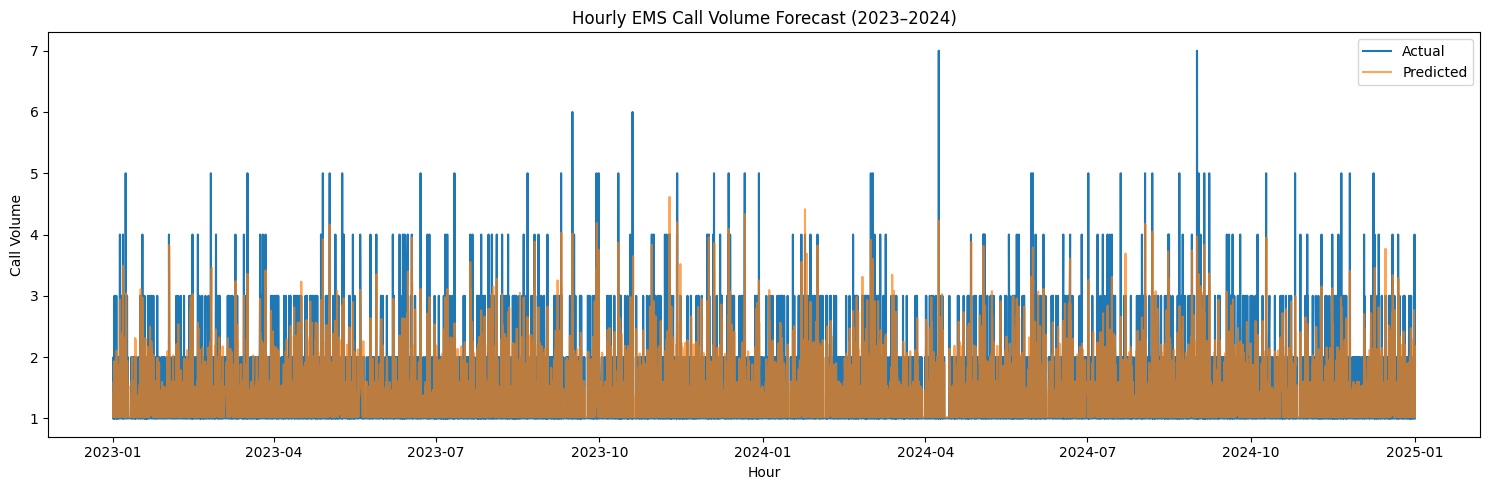

In [17]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(max_iter=200, learning_rate=0.05)
model.fit(X_train, y_train)
preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"Hourly Forecast RMSE (2023–2024): {rmse:.2f}")

# --- 8. Plot Results ---
plt.figure(figsize=(15, 5))
plt.plot(test['hour'], y_test.values, label='Actual')
plt.plot(test['hour'], preds, label='Predicted', alpha=0.7)
plt.legend()
plt.title('Hourly EMS Call Volume Forecast (2023–2024)')
plt.xlabel('Hour')
plt.ylabel('Call Volume')
plt.tight_layout()
plt.show()